### Deliverable 1: Preprocessing the Data for a Neural Network

In [15]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [16]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns="EIN")
application_df = application_df.drop(columns="NAME")

In [17]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [18]:
# Look at APPLICATION_TYPE value counts for binning
application_count = application_df.APPLICATION_TYPE.value_counts()
application_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

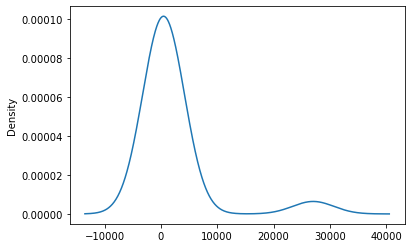

In [19]:
# Visualize the value counts of APPLICATION_TYPE
application_count.plot.density()

In [20]:
# Determine which values to replace if counts are less than ...?
replace_application_count = list(application_count[application_count < 528].index)

# Replace in dataframe
for app in replace_application_count:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [21]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df.CLASSIFICATION.value_counts()
classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

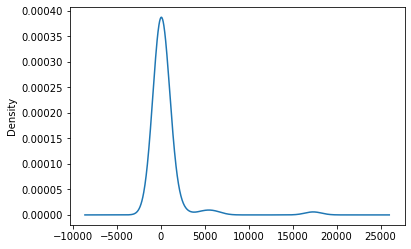

In [22]:
# Visualize the value counts of CLASSIFICATION
classification_count.plot.density()

In [23]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_count[classification_count < 1883].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [24]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [25]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\andre\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\andre\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\andre\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [29]:
# Define model 1 - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len(X_train[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 10
hidden_nodes_layer3 = 5


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# # Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# # Fourht hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                440       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 611
Trainable params: 611
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile model 1
nn.compile(loss="binary_crossentropy", optimizer="adamax", metrics=["accuracy"])

import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("Resources/",exist_ok=True)
checkpoint_path = "Resources/weights.{epoch:04d}.hdf5"

# Create a callback that saves the model's weights every 5 epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period =5)

# # Save the weights using the `checkpoint_path` format
nn.save_weights(checkpoint_path.format(epoch=5))

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=1000,callbacks=[cp_callback])

Epoch 1/1000
804/804 [==============================] - 1s 554us/step - loss: 0.6910 - accuracy: 0.5722
Epoch 2/1000
804/804 [==============================] - 0s 553us/step - loss: 0.6448 - accuracy: 0.6435
Epoch 3/1000
804/804 [==============================] - 0s 548us/step - loss: 0.5999 - accuracy: 0.7075
Epoch 4/1000
804/804 [==============================] - 0s 556us/step - loss: 0.5771 - accuracy: 0.7221
Epoch 5/1000
722/804 [=========================>....] - ETA: 0s - loss: 0.5699 - accuracy: 0.7248
Epoch 00005: saving model to Resources\weights.0005.hdf5
804/804 [==============================] - 0s 580us/step - loss: 0.5694 - accuracy: 0.7251
Epoch 6/1000
804/804 [==============================] - 0s 571us/step - loss: 0.5654 - accuracy: 0.7271
Epoch 7/1000
804/804 [==============================] - 0s 571us/step - loss: 0.5626 - accuracy: 0.7278
Epoch 8/1000
804/804 [==============================] - 0s 565us/step - loss: 0.5606 - accuracy: 0.7284
Epoch 9/1000
804/804 [====

804/804 [==============================] - 0s 580us/step - loss: 0.5462 - accuracy: 0.7355
Epoch 62/1000
804/804 [==============================] - 0s 575us/step - loss: 0.5460 - accuracy: 0.7365
Epoch 63/1000
804/804 [==============================] - 0s 581us/step - loss: 0.5460 - accuracy: 0.7368
Epoch 64/1000
804/804 [==============================] - 0s 591us/step - loss: 0.5457 - accuracy: 0.7355
Epoch 65/1000
786/804 [============================>.] - ETA: 0s - loss: 0.5464 - accuracy: 0.7346
Epoch 00065: saving model to Resources\weights.0065.hdf5
804/804 [==============================] - 0s 596us/step - loss: 0.5457 - accuracy: 0.7349
Epoch 66/1000
804/804 [==============================] - 0s 580us/step - loss: 0.5458 - accuracy: 0.7362
Epoch 67/1000
804/804 [==============================] - 0s 580us/step - loss: 0.5457 - accuracy: 0.7362
Epoch 68/1000
804/804 [==============================] - 1s 642us/step - loss: 0.5457 - accuracy: 0.7359
Epoch 69/1000
804/804 [=========

804/804 [==============================] - 0s 587us/step - loss: 0.5434 - accuracy: 0.7372
Epoch 123/1000
804/804 [==============================] - 0s 586us/step - loss: 0.5435 - accuracy: 0.7364
Epoch 124/1000
804/804 [==============================] - 0s 594us/step - loss: 0.5435 - accuracy: 0.7367
Epoch 125/1000
777/804 [===========================>..] - ETA: 0s - loss: 0.5429 - accuracy: 0.7368
Epoch 00125: saving model to Resources\weights.0125.hdf5
804/804 [==============================] - 0s 603us/step - loss: 0.5434 - accuracy: 0.7365
Epoch 126/1000
804/804 [==============================] - 0s 587us/step - loss: 0.5434 - accuracy: 0.7369
Epoch 127/1000
804/804 [==============================] - 0s 591us/step - loss: 0.5433 - accuracy: 0.7366
Epoch 128/1000
804/804 [==============================] - 0s 588us/step - loss: 0.5434 - accuracy: 0.7369
Epoch 129/1000
804/804 [==============================] - 0s 589us/step - loss: 0.5433 - accuracy: 0.7362
Epoch 130/1000
782/804 [=

804/804 [==============================] - 0s 595us/step - loss: 0.5422 - accuracy: 0.7371
Epoch 184/1000
804/804 [==============================] - 0s 597us/step - loss: 0.5422 - accuracy: 0.7374
Epoch 185/1000
764/804 [===========================>..] - ETA: 0s - loss: 0.5419 - accuracy: 0.7384
Epoch 00185: saving model to Resources\weights.0185.hdf5
804/804 [==============================] - 0s 611us/step - loss: 0.5423 - accuracy: 0.7376
Epoch 186/1000
804/804 [==============================] - 0s 586us/step - loss: 0.5421 - accuracy: 0.7372
Epoch 187/1000
804/804 [==============================] - 0s 594us/step - loss: 0.5420 - accuracy: 0.7374
Epoch 188/1000
804/804 [==============================] - 0s 606us/step - loss: 0.5422 - accuracy: 0.7376
Epoch 189/1000
804/804 [==============================] - 0s 614us/step - loss: 0.5421 - accuracy: 0.7379
Epoch 190/1000
773/804 [===========================>..] - ETA: 0s - loss: 0.5423 - accuracy: 0.7373
Epoch 00190: saving model to Re

804/804 [==============================] - 0s 601us/step - loss: 0.5414 - accuracy: 0.7372
Epoch 245/1000
744/804 [==========================>...] - ETA: 0s - loss: 0.5420 - accuracy: 0.7372
Epoch 00245: saving model to Resources\weights.0245.hdf5
804/804 [==============================] - 1s 630us/step - loss: 0.5415 - accuracy: 0.7376
Epoch 246/1000
804/804 [==============================] - 0s 604us/step - loss: 0.5412 - accuracy: 0.7375
Epoch 247/1000
804/804 [==============================] - 0s 611us/step - loss: 0.5412 - accuracy: 0.7376
Epoch 248/1000
804/804 [==============================] - 0s 619us/step - loss: 0.5412 - accuracy: 0.7373
Epoch 249/1000
804/804 [==============================] - 0s 608us/step - loss: 0.5413 - accuracy: 0.7385
Epoch 250/1000
749/804 [==========================>...] - ETA: 0s - loss: 0.5423 - accuracy: 0.7374
Epoch 00250: saving model to Resources\weights.0250.hdf5
804/804 [==============================] - 1s 623us/step - loss: 0.5411 - accura

745/804 [==========================>...] - ETA: 0s - loss: 0.5401 - accuracy: 0.7385
Epoch 00305: saving model to Resources\weights.0305.hdf5
804/804 [==============================] - 0s 619us/step - loss: 0.5408 - accuracy: 0.7380
Epoch 306/1000
804/804 [==============================] - 0s 615us/step - loss: 0.5406 - accuracy: 0.7388
Epoch 307/1000
804/804 [==============================] - 0s 606us/step - loss: 0.5407 - accuracy: 0.7383
Epoch 308/1000
804/804 [==============================] - 0s 612us/step - loss: 0.5408 - accuracy: 0.7383
Epoch 309/1000
804/804 [==============================] - 0s 614us/step - loss: 0.5407 - accuracy: 0.7381
Epoch 310/1000
735/804 [==========================>...] - ETA: 0s - loss: 0.5420 - accuracy: 0.7385
Epoch 00310: saving model to Resources\weights.0310.hdf5
804/804 [==============================] - 1s 634us/step - loss: 0.5407 - accuracy: 0.7386
Epoch 311/1000
804/804 [==============================] - 0s 613us/step - loss: 0.5408 - accura

Epoch 00365: saving model to Resources\weights.0365.hdf5
804/804 [==============================] - 1s 624us/step - loss: 0.5405 - accuracy: 0.7379
Epoch 366/1000
804/804 [==============================] - 0s 618us/step - loss: 0.5405 - accuracy: 0.7388
Epoch 367/1000
804/804 [==============================] - 1s 651us/step - loss: 0.5406 - accuracy: 0.7390
Epoch 368/1000
804/804 [==============================] - 1s 682us/step - loss: 0.5405 - accuracy: 0.7386
Epoch 369/1000
804/804 [==============================] - 1s 766us/step - loss: 0.5403 - accuracy: 0.7385
Epoch 370/1000
771/804 [===========================>..] - ETA: 0s - loss: 0.5404 - accuracy: 0.7382
Epoch 00370: saving model to Resources\weights.0370.hdf5
804/804 [==============================] - 1s 671us/step - loss: 0.5405 - accuracy: 0.7385
Epoch 371/1000
804/804 [==============================] - 1s 730us/step - loss: 0.5403 - accuracy: 0.7383
Epoch 372/1000
804/804 [==============================] - 1s 709us/step - 

Epoch 426/1000
804/804 [==============================] - 1s 849us/step - loss: 0.5402 - accuracy: 0.7385
Epoch 427/1000
804/804 [==============================] - 1s 721us/step - loss: 0.5401 - accuracy: 0.7384
Epoch 428/1000
804/804 [==============================] - 1s 752us/step - loss: 0.5403 - accuracy: 0.7387
Epoch 429/1000
804/804 [==============================] - 1s 759us/step - loss: 0.5402 - accuracy: 0.7386
Epoch 430/1000
796/804 [============================>.] - ETA: 0s - loss: 0.5405 - accuracy: 0.7383
Epoch 00430: saving model to Resources\weights.0430.hdf5
804/804 [==============================] - 1s 778us/step - loss: 0.5403 - accuracy: 0.7383
Epoch 431/1000
804/804 [==============================] - 1s 767us/step - loss: 0.5402 - accuracy: 0.7385
Epoch 432/1000
804/804 [==============================] - 1s 853us/step - loss: 0.5403 - accuracy: 0.7386
Epoch 433/1000
804/804 [==============================] - 1s 766us/step - loss: 0.5402 - accuracy: 0.7384
Epoch 434/

804/804 [==============================] - 1s 626us/step - loss: 0.5401 - accuracy: 0.7379
Epoch 488/1000
804/804 [==============================] - ETA: 0s - loss: 0.5403 - accuracy: 0.73 - 0s 616us/step - loss: 0.5399 - accuracy: 0.7384
Epoch 489/1000
804/804 [==============================] - 1s 638us/step - loss: 0.5400 - accuracy: 0.7383
Epoch 490/1000
764/804 [===========================>..] - ETA: 0s - loss: 0.5402 - accuracy: 0.7382
Epoch 00490: saving model to Resources\weights.0490.hdf5
804/804 [==============================] - 1s 947us/step - loss: 0.5400 - accuracy: 0.7388
Epoch 491/1000
804/804 [==============================] - 1s 940us/step - loss: 0.5401 - accuracy: 0.7385
Epoch 492/1000
804/804 [==============================] - 1s 761us/step - loss: 0.5400 - accuracy: 0.7384
Epoch 493/1000
804/804 [==============================] - 1s 704us/step - loss: 0.5400 - accuracy: 0.7384
Epoch 494/1000
804/804 [==============================] - 1s 786us/step - loss: 0.5399 - 

Epoch 548/1000
804/804 [==============================] - 0s 604us/step - loss: 0.5398 - accuracy: 0.7388
Epoch 549/1000
804/804 [==============================] - 0s 609us/step - loss: 0.5397 - accuracy: 0.7391
Epoch 550/1000
733/804 [==========================>...] - ETA: 0s - loss: 0.5397 - accuracy: 0.7389
Epoch 00550: saving model to Resources\weights.0550.hdf5
804/804 [==============================] - 1s 634us/step - loss: 0.5398 - accuracy: 0.7385
Epoch 551/1000
804/804 [==============================] - 0s 605us/step - loss: 0.5399 - accuracy: 0.7386
Epoch 552/1000
804/804 [==============================] - 0s 620us/step - loss: 0.5398 - accuracy: 0.7389
Epoch 553/1000
804/804 [==============================] - 0s 610us/step - loss: 0.5399 - accuracy: 0.7385
Epoch 554/1000
804/804 [==============================] - 0s 617us/step - loss: 0.5398 - accuracy: 0.7389
Epoch 555/1000
750/804 [==========================>...] - ETA: 0s - loss: 0.5391 - accuracy: 0.7393
Epoch 00555: sav

804/804 [==============================] - 1s 626us/step - loss: 0.5395 - accuracy: 0.7385
Epoch 610/1000
727/804 [==========================>...] - ETA: 0s - loss: 0.5388 - accuracy: 0.7395
Epoch 00610: saving model to Resources\weights.0610.hdf5
804/804 [==============================] - 1s 637us/step - loss: 0.5395 - accuracy: 0.7389
Epoch 611/1000
804/804 [==============================] - 1s 625us/step - loss: 0.5396 - accuracy: 0.7390
Epoch 612/1000
804/804 [==============================] - 0s 621us/step - loss: 0.5396 - accuracy: 0.7395
Epoch 613/1000
804/804 [==============================] - 0s 620us/step - loss: 0.5395 - accuracy: 0.7388
Epoch 614/1000
804/804 [==============================] - 1s 623us/step - loss: 0.5395 - accuracy: 0.7388
Epoch 615/1000
736/804 [==========================>...] - ETA: 0s - loss: 0.5401 - accuracy: 0.7389
Epoch 00615: saving model to Resources\weights.0615.hdf5
804/804 [==============================] - 1s 628us/step - loss: 0.5398 - accura

794/804 [============================>.] - ETA: 0s - loss: 0.5392 - accuracy: 0.7392
Epoch 00670: saving model to Resources\weights.0670.hdf5
804/804 [==============================] - 1s 648us/step - loss: 0.5394 - accuracy: 0.7392
Epoch 671/1000
804/804 [==============================] - 1s 628us/step - loss: 0.5395 - accuracy: 0.7388
Epoch 672/1000
804/804 [==============================] - 1s 634us/step - loss: 0.5395 - accuracy: 0.7395
Epoch 673/1000
804/804 [==============================] - 1s 625us/step - loss: 0.5393 - accuracy: 0.7390
Epoch 674/1000
804/804 [==============================] - 1s 626us/step - loss: 0.5395 - accuracy: 0.7393
Epoch 675/1000
729/804 [==========================>...] - ETA: 0s - loss: 0.5394 - accuracy: 0.7386
Epoch 00675: saving model to Resources\weights.0675.hdf5
804/804 [==============================] - 1s 642us/step - loss: 0.5395 - accuracy: 0.7387
Epoch 676/1000
804/804 [==============================] - 1s 624us/step - loss: 0.5395 - accura

804/804 [==============================] - 1s 686us/step - loss: 0.5394 - accuracy: 0.7391
Epoch 731/1000
804/804 [==============================] - 1s 686us/step - loss: 0.5393 - accuracy: 0.7390
Epoch 732/1000
804/804 [==============================] - 1s 683us/step - loss: 0.5392 - accuracy: 0.7398
Epoch 733/1000
804/804 [==============================] - 1s 686us/step - loss: 0.5393 - accuracy: 0.7392
Epoch 734/1000
804/804 [==============================] - 1s 724us/step - loss: 0.5393 - accuracy: 0.7394
Epoch 735/1000
798/804 [============================>.] - ETA: 0s - loss: 0.5396 - accuracy: 0.7389
Epoch 00735: saving model to Resources\weights.0735.hdf5
804/804 [==============================] - 1s 715us/step - loss: 0.5394 - accuracy: 0.7390
Epoch 736/1000
804/804 [==============================] - 1s 661us/step - loss: 0.5392 - accuracy: 0.7387
Epoch 737/1000
804/804 [==============================] - 1s 690us/step - loss: 0.5393 - accuracy: 0.7391
Epoch 738/1000
804/804 [=

804/804 [==============================] - 1s 785us/step - loss: 0.5390 - accuracy: 0.7394
Epoch 792/1000
804/804 [==============================] - 1s 854us/step - loss: 0.5389 - accuracy: 0.7391
Epoch 793/1000
804/804 [==============================] - 1s 759us/step - loss: 0.5393 - accuracy: 0.7392
Epoch 794/1000
804/804 [==============================] - 1s 748us/step - loss: 0.5391 - accuracy: 0.7396
Epoch 795/1000
797/804 [============================>.] - ETA: 0s - loss: 0.5398 - accuracy: 0.7389
Epoch 00795: saving model to Resources\weights.0795.hdf5
804/804 [==============================] - 1s 779us/step - loss: 0.5392 - accuracy: 0.7393
Epoch 796/1000
804/804 [==============================] - 1s 782us/step - loss: 0.5392 - accuracy: 0.7392
Epoch 797/1000
804/804 [==============================] - 1s 833us/step - loss: 0.5391 - accuracy: 0.7392
Epoch 798/1000
804/804 [==============================] - 1s 836us/step - loss: 0.5392 - accuracy: 0.7388
Epoch 799/1000
804/804 [=

804/804 [==============================] - 1s 668us/step - loss: 0.5392 - accuracy: 0.7397
Epoch 853/1000
804/804 [==============================] - 1s 674us/step - loss: 0.5389 - accuracy: 0.7393
Epoch 854/1000
804/804 [==============================] - 1s 669us/step - loss: 0.5390 - accuracy: 0.7393
Epoch 855/1000
757/804 [===========================>..] - ETA: 0s - loss: 0.5395 - accuracy: 0.7391
Epoch 00855: saving model to Resources\weights.0855.hdf5
804/804 [==============================] - 1s 678us/step - loss: 0.5390 - accuracy: 0.7392
Epoch 856/1000
804/804 [==============================] - 1s 679us/step - loss: 0.5391 - accuracy: 0.7395
Epoch 857/1000
804/804 [==============================] - 1s 678us/step - loss: 0.5391 - accuracy: 0.7392
Epoch 858/1000
804/804 [==============================] - 1s 745us/step - loss: 0.5390 - accuracy: 0.7392
Epoch 859/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5389 - accuracy: 0.7392
Epoch 860/1000
793/804 [===

Epoch 913/1000
804/804 [==============================] - 0s 583us/step - loss: 0.5389 - accuracy: 0.7391
Epoch 914/1000
804/804 [==============================] - 0s 581us/step - loss: 0.5390 - accuracy: 0.7391
Epoch 915/1000
779/804 [============================>.] - ETA: 0s - loss: 0.5393 - accuracy: 0.7387
Epoch 00915: saving model to Resources\weights.0915.hdf5
804/804 [==============================] - 0s 600us/step - loss: 0.5388 - accuracy: 0.7392
Epoch 916/1000
804/804 [==============================] - 0s 584us/step - loss: 0.5390 - accuracy: 0.7393
Epoch 917/1000
804/804 [==============================] - 0s 587us/step - loss: 0.5389 - accuracy: 0.7393
Epoch 918/1000
804/804 [==============================] - 0s 606us/step - loss: 0.5389 - accuracy: 0.7394
Epoch 919/1000
804/804 [==============================] - 0s 588us/step - loss: 0.5387 - accuracy: 0.7391
Epoch 920/1000
772/804 [===========================>..] - ETA: 0s - loss: 0.5384 - accuracy: 0.7397
Epoch 00920: sav

804/804 [==============================] - 1s 622us/step - loss: 0.5388 - accuracy: 0.7390
Epoch 974/1000
804/804 [==============================] - 1s 623us/step - loss: 0.5388 - accuracy: 0.7388
Epoch 975/1000
731/804 [==========================>...] - ETA: 0s - loss: 0.5393 - accuracy: 0.7386
Epoch 00975: saving model to Resources\weights.0975.hdf5
804/804 [==============================] - 1s 640us/step - loss: 0.5387 - accuracy: 0.7391
Epoch 976/1000
804/804 [==============================] - 1s 742us/step - loss: 0.5388 - accuracy: 0.7393
Epoch 977/1000
804/804 [==============================] - 1s 825us/step - loss: 0.5387 - accuracy: 0.7394
Epoch 978/1000
804/804 [==============================] - 1s 731us/step - loss: 0.5390 - accuracy: 0.7392
Epoch 979/1000
804/804 [==============================] - 1s 634us/step - loss: 0.5388 - accuracy: 0.7388
Epoch 980/1000
735/804 [==========================>...] - ETA: 0s - loss: 0.5385 - accuracy: 0.7389
Epoch 00980: saving model to Re

In [31]:
# Evaluate model 1 using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5530 - accuracy: 0.7244 - 162ms/epoch - 604us/step
Loss: 0.5529782772064209, Accuracy: 0.7244315147399902


In [32]:
# Define model 2- deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 8
hidden_nodes_layer3 = 5
hidden_nodes_layer4 = 3

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# # Fourht hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 352       
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dense_6 (Dense)             (None, 5)                 45        
                                                                 
 dense_7 (Dense)             (None, 3)                 18        
                                                                 
 dense_8 (Dense)             (None, 1)                 4         
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile model 2
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("Resources/",exist_ok=True)
checkpoint_path = "Resources/weights.{epoch:04d}.hdf5"

# Create a callback that saves the model's weights every 5 epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period =5)

# # Save the weights using the `checkpoint_path` format
nn.save_weights(checkpoint_path.format(epoch=5))

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=1200,callbacks=[cp_callback])

Epoch 1/1200
804/804 [==============================] - 1s 604us/step - loss: 0.6302 - accuracy: 0.6913
Epoch 2/1200
804/804 [==============================] - 0s 602us/step - loss: 0.5773 - accuracy: 0.7240
Epoch 3/1200
804/804 [==============================] - 0s 598us/step - loss: 0.5656 - accuracy: 0.7283
Epoch 4/1200
804/804 [==============================] - 0s 602us/step - loss: 0.5613 - accuracy: 0.7277
Epoch 5/1200
759/804 [===========================>..] - ETA: 0s - loss: 0.5588 - accuracy: 0.7288
Epoch 00005: saving model to Resources\weights.0005.hdf5
804/804 [==============================] - 0s 620us/step - loss: 0.5592 - accuracy: 0.7284
Epoch 6/1200
804/804 [==============================] - 0s 595us/step - loss: 0.5572 - accuracy: 0.7299
Epoch 7/1200
804/804 [==============================] - 0s 597us/step - loss: 0.5568 - accuracy: 0.7287
Epoch 8/1200
804/804 [==============================] - 0s 602us/step - loss: 0.5558 - accuracy: 0.7304
Epoch 9/1200
804/804 [====

804/804 [==============================] - 1s 622us/step - loss: 0.5464 - accuracy: 0.7354
Epoch 62/1200
804/804 [==============================] - 1s 625us/step - loss: 0.5460 - accuracy: 0.7354
Epoch 63/1200
804/804 [==============================] - 1s 626us/step - loss: 0.5462 - accuracy: 0.7347
Epoch 64/1200
804/804 [==============================] - 1s 630us/step - loss: 0.5463 - accuracy: 0.7347
Epoch 65/1200
725/804 [==========================>...] - ETA: 0s - loss: 0.5448 - accuracy: 0.7362
Epoch 00065: saving model to Resources\weights.0065.hdf5
804/804 [==============================] - 1s 639us/step - loss: 0.5458 - accuracy: 0.7357
Epoch 66/1200
804/804 [==============================] - 1s 648us/step - loss: 0.5463 - accuracy: 0.7349
Epoch 67/1200
804/804 [==============================] - 1s 625us/step - loss: 0.5459 - accuracy: 0.7347
Epoch 68/1200
804/804 [==============================] - 1s 631us/step - loss: 0.5466 - accuracy: 0.7355
Epoch 69/1200
804/804 [=========

804/804 [==============================] - 1s 642us/step - loss: 0.5441 - accuracy: 0.7373
Epoch 123/1200
804/804 [==============================] - 1s 645us/step - loss: 0.5439 - accuracy: 0.7376
Epoch 124/1200
804/804 [==============================] - 1s 642us/step - loss: 0.5438 - accuracy: 0.7379
Epoch 125/1200
788/804 [============================>.] - ETA: 0s - loss: 0.5442 - accuracy: 0.7372
Epoch 00125: saving model to Resources\weights.0125.hdf5
804/804 [==============================] - 1s 663us/step - loss: 0.5443 - accuracy: 0.7373
Epoch 126/1200
804/804 [==============================] - 1s 634us/step - loss: 0.5439 - accuracy: 0.7368
Epoch 127/1200
804/804 [==============================] - 1s 636us/step - loss: 0.5443 - accuracy: 0.7379
Epoch 128/1200
804/804 [==============================] - 1s 636us/step - loss: 0.5442 - accuracy: 0.7378
Epoch 129/1200
804/804 [==============================] - 1s 643us/step - loss: 0.5442 - accuracy: 0.7372
Epoch 130/1200
772/804 [=

804/804 [==============================] - 1s 659us/step - loss: 0.5428 - accuracy: 0.7371
Epoch 184/1200
804/804 [==============================] - 1s 658us/step - loss: 0.5430 - accuracy: 0.7382
Epoch 185/1200
770/804 [===========================>..] - ETA: 0s - loss: 0.5432 - accuracy: 0.7368
Epoch 00185: saving model to Resources\weights.0185.hdf5
804/804 [==============================] - 1s 671us/step - loss: 0.5428 - accuracy: 0.7369
Epoch 186/1200
804/804 [==============================] - 1s 663us/step - loss: 0.5429 - accuracy: 0.7383
Epoch 187/1200
804/804 [==============================] - 1s 656us/step - loss: 0.5429 - accuracy: 0.7380
Epoch 188/1200
804/804 [==============================] - 1s 655us/step - loss: 0.5431 - accuracy: 0.7366
Epoch 189/1200
804/804 [==============================] - 1s 656us/step - loss: 0.5428 - accuracy: 0.7380
Epoch 190/1200
780/804 [============================>.] - ETA: 0s - loss: 0.5423 - accuracy: 0.7388
Epoch 00190: saving model to Re

804/804 [==============================] - 1s 672us/step - loss: 0.5429 - accuracy: 0.7379
Epoch 244/1200
804/804 [==============================] - 1s 680us/step - loss: 0.5424 - accuracy: 0.7370
Epoch 245/1200
740/804 [==========================>...] - ETA: 0s - loss: 0.5427 - accuracy: 0.7367
Epoch 00245: saving model to Resources\weights.0245.hdf5
804/804 [==============================] - 1s 701us/step - loss: 0.5422 - accuracy: 0.7374
Epoch 246/1200
804/804 [==============================] - 1s 680us/step - loss: 0.5424 - accuracy: 0.7377
Epoch 247/1200
804/804 [==============================] - 1s 691us/step - loss: 0.5424 - accuracy: 0.7374
Epoch 248/1200
804/804 [==============================] - 1s 682us/step - loss: 0.5426 - accuracy: 0.7384
Epoch 249/1200
804/804 [==============================] - 1s 671us/step - loss: 0.5423 - accuracy: 0.7381
Epoch 250/1200
749/804 [==========================>...] - ETA: 0s - loss: 0.5423 - accuracy: 0.7385
Epoch 00250: saving model to Re

804/804 [==============================] - 1s 683us/step - loss: 0.5423 - accuracy: 0.7383
Epoch 305/1200
743/804 [==========================>...] - ETA: 0s - loss: 0.5418 - accuracy: 0.7389
Epoch 00305: saving model to Resources\weights.0305.hdf5
804/804 [==============================] - 1s 699us/step - loss: 0.5419 - accuracy: 0.7392
Epoch 306/1200
804/804 [==============================] - 1s 672us/step - loss: 0.5423 - accuracy: 0.7374
Epoch 307/1200
804/804 [==============================] - 1s 697us/step - loss: 0.5423 - accuracy: 0.7376
Epoch 308/1200
804/804 [==============================] - 1s 686us/step - loss: 0.5418 - accuracy: 0.7381
Epoch 309/1200
804/804 [==============================] - 1s 693us/step - loss: 0.5420 - accuracy: 0.7374
Epoch 310/1200
734/804 [==========================>...] - ETA: 0s - loss: 0.5415 - accuracy: 0.7394
Epoch 00310: saving model to Resources\weights.0310.hdf5
804/804 [==============================] - 1s 711us/step - loss: 0.5422 - accura

768/804 [===========================>..] - ETA: 0s - loss: 0.5412 - accuracy: 0.7391
Epoch 00365: saving model to Resources\weights.0365.hdf5
804/804 [==============================] - 1s 819us/step - loss: 0.5418 - accuracy: 0.7385
Epoch 366/1200
804/804 [==============================] - 1s 1ms/step - loss: 0.5420 - accuracy: 0.7393
Epoch 367/1200
804/804 [==============================] - 1s 1ms/step - loss: 0.5418 - accuracy: 0.7372
Epoch 368/1200
804/804 [==============================] - 1s 968us/step - loss: 0.5417 - accuracy: 0.7390
Epoch 369/1200
804/804 [==============================] - 1s 801us/step - loss: 0.5416 - accuracy: 0.7380
Epoch 370/1200
792/804 [============================>.] - ETA: 0s - loss: 0.5409 - accuracy: 0.7390
Epoch 00370: saving model to Resources\weights.0370.hdf5
804/804 [==============================] - 1s 856us/step - loss: 0.5416 - accuracy: 0.7386
Epoch 371/1200
804/804 [==============================] - 1s 892us/step - loss: 0.5416 - accuracy: 

804/804 [==============================] - 1s 716us/step - loss: 0.5417 - accuracy: 0.7384
Epoch 426/1200
804/804 [==============================] - 1s 719us/step - loss: 0.5420 - accuracy: 0.7379
Epoch 427/1200
804/804 [==============================] - 1s 712us/step - loss: 0.5418 - accuracy: 0.7387
Epoch 428/1200
804/804 [==============================] - 1s 714us/step - loss: 0.5422 - accuracy: 0.7386
Epoch 429/1200
804/804 [==============================] - 1s 751us/step - loss: 0.5418 - accuracy: 0.7383
Epoch 430/1200
774/804 [===========================>..] - ETA: 0s - loss: 0.5410 - accuracy: 0.7401
Epoch 00430: saving model to Resources\weights.0430.hdf5
804/804 [==============================] - 1s 737us/step - loss: 0.5422 - accuracy: 0.7390
Epoch 431/1200
804/804 [==============================] - 1s 714us/step - loss: 0.5419 - accuracy: 0.7374
Epoch 432/1200
804/804 [==============================] - 1s 722us/step - loss: 0.5419 - accuracy: 0.7383
Epoch 433/1200
804/804 [=

Epoch 486/1200
804/804 [==============================] - 1s 668us/step - loss: 0.5423 - accuracy: 0.7379
Epoch 487/1200
804/804 [==============================] - 1s 671us/step - loss: 0.5416 - accuracy: 0.7389
Epoch 488/1200
804/804 [==============================] - 1s 677us/step - loss: 0.5417 - accuracy: 0.7376
Epoch 489/1200
804/804 [==============================] - 1s 675us/step - loss: 0.5417 - accuracy: 0.7390
Epoch 490/1200
758/804 [===========================>..] - ETA: 0s - loss: 0.5415 - accuracy: 0.7378
Epoch 00490: saving model to Resources\weights.0490.hdf5
804/804 [==============================] - 1s 684us/step - loss: 0.5417 - accuracy: 0.7380
Epoch 491/1200
804/804 [==============================] - 1s 668us/step - loss: 0.5417 - accuracy: 0.7402
Epoch 492/1200
804/804 [==============================] - 1s 676us/step - loss: 0.5419 - accuracy: 0.7382
Epoch 493/1200
804/804 [==============================] - 1s 676us/step - loss: 0.5413 - accuracy: 0.7378
Epoch 494/

804/804 [==============================] - 1s 693us/step - loss: 0.5411 - accuracy: 0.7396
Epoch 548/1200
804/804 [==============================] - 1s 690us/step - loss: 0.5420 - accuracy: 0.7384
Epoch 549/1200
804/804 [==============================] - 1s 700us/step - loss: 0.5409 - accuracy: 0.7397
Epoch 550/1200
732/804 [==========================>...] - ETA: 0s - loss: 0.5396 - accuracy: 0.7400
Epoch 00550: saving model to Resources\weights.0550.hdf5
804/804 [==============================] - 1s 712us/step - loss: 0.5410 - accuracy: 0.7379
Epoch 551/1200
804/804 [==============================] - 1s 704us/step - loss: 0.5415 - accuracy: 0.7386
Epoch 552/1200
804/804 [==============================] - 1s 686us/step - loss: 0.5412 - accuracy: 0.7404
Epoch 553/1200
804/804 [==============================] - 1s 694us/step - loss: 0.5413 - accuracy: 0.7378
Epoch 554/1200
804/804 [==============================] - 1s 687us/step - loss: 0.5411 - accuracy: 0.7389
Epoch 555/1200
802/804 [=

804/804 [==============================] - 1s 700us/step - loss: 0.5410 - accuracy: 0.7383
Epoch 609/1200
804/804 [==============================] - 1s 697us/step - loss: 0.5414 - accuracy: 0.7386
Epoch 610/1200
793/804 [============================>.] - ETA: 0s - loss: 0.5417 - accuracy: 0.7385
Epoch 00610: saving model to Resources\weights.0610.hdf5
804/804 [==============================] - 1s 723us/step - loss: 0.5415 - accuracy: 0.7388
Epoch 611/1200
804/804 [==============================] - 1s 703us/step - loss: 0.5413 - accuracy: 0.7387
Epoch 612/1200
804/804 [==============================] - 1s 697us/step - loss: 0.5415 - accuracy: 0.7391
Epoch 613/1200
804/804 [==============================] - 1s 691us/step - loss: 0.5414 - accuracy: 0.7385
Epoch 614/1200
804/804 [==============================] - 1s 714us/step - loss: 0.5410 - accuracy: 0.7392
Epoch 615/1200
786/804 [============================>.] - ETA: 0s - loss: 0.5414 - accuracy: 0.7385
Epoch 00615: saving model to Re

804/804 [==============================] - 1s 805us/step - loss: 0.5416 - accuracy: 0.7387
Epoch 670/1200
762/804 [===========================>..] - ETA: 0s - loss: 0.5418 - accuracy: 0.7390
Epoch 00670: saving model to Resources\weights.0670.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5415 - accuracy: 0.7392
Epoch 671/1200
804/804 [==============================] - 1s 1ms/step - loss: 0.5414 - accuracy: 0.7393
Epoch 672/1200
804/804 [==============================] - 1s 978us/step - loss: 0.5413 - accuracy: 0.7385
Epoch 673/1200
804/804 [==============================] - 1s 869us/step - loss: 0.5412 - accuracy: 0.7381
Epoch 674/1200
804/804 [==============================] - 1s 776us/step - loss: 0.5409 - accuracy: 0.7387
Epoch 675/1200
781/804 [============================>.] - ETA: 0s - loss: 0.5417 - accuracy: 0.7384
Epoch 00675: saving model to Resources\weights.0675.hdf5
804/804 [==============================] - 1s 806us/step - loss: 0.5416 - accuracy: 

753/804 [===========================>..] - ETA: 0s - loss: 0.5423 - accuracy: 0.7378
Epoch 00730: saving model to Resources\weights.0730.hdf5
804/804 [==============================] - 1s 956us/step - loss: 0.5411 - accuracy: 0.7392
Epoch 731/1200
804/804 [==============================] - 1s 840us/step - loss: 0.5408 - accuracy: 0.7386
Epoch 732/1200
804/804 [==============================] - 1s 863us/step - loss: 0.5413 - accuracy: 0.7385
Epoch 733/1200
804/804 [==============================] - 1s 870us/step - loss: 0.5409 - accuracy: 0.7383
Epoch 734/1200
804/804 [==============================] - 1s 873us/step - loss: 0.5409 - accuracy: 0.7393
Epoch 735/1200
777/804 [===========================>..] - ETA: 0s - loss: 0.5416 - accuracy: 0.7375
Epoch 00735: saving model to Resources\weights.0735.hdf5
804/804 [==============================] - 1s 870us/step - loss: 0.5420 - accuracy: 0.7376
Epoch 736/1200
804/804 [==============================] - 1s 857us/step - loss: 0.5411 - accura

Epoch 791/1200
804/804 [==============================] - 1s 727us/step - loss: 0.5405 - accuracy: 0.7391
Epoch 792/1200
804/804 [==============================] - 1s 736us/step - loss: 0.5410 - accuracy: 0.7390
Epoch 793/1200
804/804 [==============================] - 1s 714us/step - loss: 0.5407 - accuracy: 0.7392
Epoch 794/1200
804/804 [==============================] - 1s 690us/step - loss: 0.5408 - accuracy: 0.7381
Epoch 795/1200
804/804 [==============================] - ETA: 0s - loss: 0.5419 - accuracy: 0.7380
Epoch 00795: saving model to Resources\weights.0795.hdf5
804/804 [==============================] - 1s 717us/step - loss: 0.5419 - accuracy: 0.7380
Epoch 796/1200
804/804 [==============================] - 1s 701us/step - loss: 0.5409 - accuracy: 0.7390
Epoch 797/1200
804/804 [==============================] - 1s 743us/step - loss: 0.5406 - accuracy: 0.7381
Epoch 798/1200
804/804 [==============================] - 1s 758us/step - loss: 0.5409 - accuracy: 0.7396
Epoch 799/

804/804 [==============================] - 1s 702us/step - loss: 0.5418 - accuracy: 0.7376
Epoch 853/1200
804/804 [==============================] - 1s 690us/step - loss: 0.5404 - accuracy: 0.7392
Epoch 854/1200
804/804 [==============================] - 1s 705us/step - loss: 0.5406 - accuracy: 0.7385
Epoch 855/1200
799/804 [============================>.] - ETA: 0s - loss: 0.5408 - accuracy: 0.7374 ETA: 0s - loss: 0.5422 - accuracy: 0.
Epoch 00855: saving model to Resources\weights.0855.hdf5
804/804 [==============================] - 1s 718us/step - loss: 0.5408 - accuracy: 0.7374
Epoch 856/1200
804/804 [==============================] - 1s 698us/step - loss: 0.5407 - accuracy: 0.7396
Epoch 857/1200
804/804 [==============================] - 1s 744us/step - loss: 0.5409 - accuracy: 0.7390
Epoch 858/1200
804/804 [==============================] - 1s 894us/step - loss: 0.5408 - accuracy: 0.7397
Epoch 859/1200
804/804 [==============================] - 1s 869us/step - loss: 0.5405 - accu

Epoch 913/1200
804/804 [==============================] - 1s 750us/step - loss: 0.5403 - accuracy: 0.7390
Epoch 914/1200
804/804 [==============================] - 1s 735us/step - loss: 0.5400 - accuracy: 0.7387
Epoch 915/1200
790/804 [============================>.] - ETA: 0s - loss: 0.5411 - accuracy: 0.7367
Epoch 00915: saving model to Resources\weights.0915.hdf5
804/804 [==============================] - 1s 725us/step - loss: 0.5402 - accuracy: 0.7377
Epoch 916/1200
804/804 [==============================] - 1s 713us/step - loss: 0.5401 - accuracy: 0.7393
Epoch 917/1200
804/804 [==============================] - 1s 703us/step - loss: 0.5409 - accuracy: 0.7385
Epoch 918/1200
804/804 [==============================] - 1s 718us/step - loss: 0.5411 - accuracy: 0.7381
Epoch 919/1200
804/804 [==============================] - 1s 735us/step - loss: 0.5406 - accuracy: 0.7385
Epoch 920/1200
802/804 [============================>.] - ETA: 0s - loss: 0.5409 - accuracy: 0.7384
Epoch 00920: sav

804/804 [==============================] - 1s 769us/step - loss: 0.5397 - accuracy: 0.7404
Epoch 975/1200
790/804 [============================>.] - ETA: 0s - loss: 0.5404 - accuracy: 0.7394
Epoch 00975: saving model to Resources\weights.0975.hdf5
804/804 [==============================] - 1s 861us/step - loss: 0.5402 - accuracy: 0.7394
Epoch 976/1200
804/804 [==============================] - 1s 855us/step - loss: 0.5401 - accuracy: 0.7381
Epoch 977/1200
804/804 [==============================] - 1s 868us/step - loss: 0.5402 - accuracy: 0.7403
Epoch 978/1200
804/804 [==============================] - 1s 913us/step - loss: 0.5402 - accuracy: 0.7385
Epoch 979/1200
804/804 [==============================] - 1s 896us/step - loss: 0.5399 - accuracy: 0.7383
Epoch 980/1200
777/804 [===========================>..] - ETA: 0s - loss: 0.5399 - accuracy: 0.7389
Epoch 00980: saving model to Resources\weights.0980.hdf5
804/804 [==============================] - 1s 932us/step - loss: 0.5399 - accura

803/804 [============================>.] - ETA: 0s - loss: 0.5404 - accuracy: 0.7374
Epoch 01035: saving model to Resources\weights.1035.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5402 - accuracy: 0.7374
Epoch 1036/1200
804/804 [==============================] - 1s 1ms/step - loss: 0.5404 - accuracy: 0.7386
Epoch 1037/1200
804/804 [==============================] - 1s 982us/step - loss: 0.5402 - accuracy: 0.7393
Epoch 1038/1200
804/804 [==============================] - 1s 931us/step - loss: 0.5400 - accuracy: 0.7393
Epoch 1039/1200
804/804 [==============================] - 1s 966us/step - loss: 0.5401 - accuracy: 0.7385
Epoch 1040/1200
768/804 [===========================>..] - ETA: 0s - loss: 0.5405 - accuracy: 0.7389
Epoch 01040: saving model to Resources\weights.1040.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5399 - accuracy: 0.7393
Epoch 1041/1200
804/804 [==============================] - 1s 2ms/step - loss: 0.5396 - accuracy

804/804 [==============================] - 1s 750us/step - loss: 0.5398 - accuracy: 0.7393
Epoch 1096/1200
804/804 [==============================] - 1s 726us/step - loss: 0.5396 - accuracy: 0.7388
Epoch 1097/1200
804/804 [==============================] - 1s 779us/step - loss: 0.5399 - accuracy: 0.7387
Epoch 1098/1200
804/804 [==============================] - 1s 802us/step - loss: 0.5398 - accuracy: 0.7400
Epoch 1099/1200
804/804 [==============================] - 1s 781us/step - loss: 0.5400 - accuracy: 0.7399
Epoch 1100/1200
775/804 [===========================>..] - ETA: 0s - loss: 0.5402 - accuracy: 0.7402
Epoch 01100: saving model to Resources\weights.1100.hdf5
804/804 [==============================] - 1s 801us/step - loss: 0.5403 - accuracy: 0.7399
Epoch 1101/1200
804/804 [==============================] - 1s 775us/step - loss: 0.5399 - accuracy: 0.7395
Epoch 1102/1200
804/804 [==============================] - 1s 792us/step - loss: 0.5398 - accuracy: 0.7398
Epoch 1103/1200
80

Epoch 1156/1200
804/804 [==============================] - 1s 671us/step - loss: 0.5398 - accuracy: 0.7402
Epoch 1157/1200
804/804 [==============================] - 1s 662us/step - loss: 0.5401 - accuracy: 0.7381
Epoch 1158/1200
804/804 [==============================] - 1s 667us/step - loss: 0.5394 - accuracy: 0.7400
Epoch 1159/1200
804/804 [==============================] - 1s 669us/step - loss: 0.5396 - accuracy: 0.7388
Epoch 1160/1200
742/804 [==========================>...] - ETA: 0s - loss: 0.5392 - accuracy: 0.7406
Epoch 01160: saving model to Resources\weights.1160.hdf5
804/804 [==============================] - 1s 694us/step - loss: 0.5398 - accuracy: 0.7402
Epoch 1161/1200
804/804 [==============================] - 1s 676us/step - loss: 0.5394 - accuracy: 0.7394
Epoch 1162/1200
804/804 [==============================] - 1s 680us/step - loss: 0.5398 - accuracy: 0.7383
Epoch 1163/1200
804/804 [==============================] - 1s 722us/step - loss: 0.5400 - accuracy: 0.7389
Ep

In [34]:
# Evaluate model 2 using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5596 - accuracy: 0.7255 - 160ms/epoch - 597us/step
Loss: 0.5595607757568359, Accuracy: 0.7254810333251953


In [35]:
# Define model 3 - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len(X_train[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 3


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                440       
                                                                 
 dense_10 (Dense)            (None, 3)                 33        
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 477
Trainable params: 477
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Compile model 3
nn.compile(loss="binary_crossentropy", optimizer="adamax", metrics=["accuracy"])
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("Resources/",exist_ok=True)
checkpoint_path = "Resources/weights.{epoch:04d}.hdf5"

# Create a callback that saves the model's weights every 5 epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period =5)

# # Save the weights using the `checkpoint_path` format
nn.save_weights(checkpoint_path.format(epoch=5))

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=500,callbacks=[cp_callback])

Epoch 1/500
804/804 [==============================] - 1s 534us/step - loss: 0.7087 - accuracy: 0.6339
Epoch 2/500
804/804 [==============================] - 0s 536us/step - loss: 0.6310 - accuracy: 0.7091
Epoch 3/500
804/804 [==============================] - 0s 553us/step - loss: 0.6119 - accuracy: 0.7139
Epoch 4/500
804/804 [==============================] - 0s 551us/step - loss: 0.6001 - accuracy: 0.7188
Epoch 5/500
728/804 [==========================>...] - ETA: 0s - loss: 0.5937 - accuracy: 0.7184
Epoch 00005: saving model to Resources\weights.0005.hdf5
804/804 [==============================] - 0s 564us/step - loss: 0.5932 - accuracy: 0.7195
Epoch 6/500
804/804 [==============================] - 0s 546us/step - loss: 0.5883 - accuracy: 0.7200
Epoch 7/500
804/804 [==============================] - 0s 534us/step - loss: 0.5847 - accuracy: 0.7213
Epoch 8/500
804/804 [==============================] - 0s 528us/step - loss: 0.5810 - accuracy: 0.7250
Epoch 9/500
804/804 [=============

804/804 [==============================] - 0s 572us/step - loss: 0.5542 - accuracy: 0.7334
Epoch 63/500
804/804 [==============================] - 0s 557us/step - loss: 0.5540 - accuracy: 0.7333
Epoch 64/500
804/804 [==============================] - 0s 563us/step - loss: 0.5539 - accuracy: 0.7334
Epoch 65/500
720/804 [=========================>....] - ETA: 0s - loss: 0.5537 - accuracy: 0.7337
Epoch 00065: saving model to Resources\weights.0065.hdf5
804/804 [==============================] - 0s 581us/step - loss: 0.5539 - accuracy: 0.7332
Epoch 66/500
804/804 [==============================] - 0s 570us/step - loss: 0.5538 - accuracy: 0.7334
Epoch 67/500
804/804 [==============================] - 0s 608us/step - loss: 0.5538 - accuracy: 0.7338
Epoch 68/500
804/804 [==============================] - 0s 583us/step - loss: 0.5536 - accuracy: 0.7337
Epoch 69/500
804/804 [==============================] - 0s 583us/step - loss: 0.5535 - accuracy: 0.7334
Epoch 70/500
787/804 [=================

804/804 [==============================] - 0s 583us/step - loss: 0.5489 - accuracy: 0.7340
Epoch 125/500
770/804 [===========================>..] - ETA: 0s - loss: 0.5490 - accuracy: 0.7347
Epoch 00125: saving model to Resources\weights.0125.hdf5
804/804 [==============================] - 1s 642us/step - loss: 0.5488 - accuracy: 0.7348
Epoch 126/500
804/804 [==============================] - 0s 590us/step - loss: 0.5489 - accuracy: 0.7341
Epoch 127/500
804/804 [==============================] - 0s 591us/step - loss: 0.5488 - accuracy: 0.7340
Epoch 128/500
804/804 [==============================] - 0s 599us/step - loss: 0.5488 - accuracy: 0.7343
Epoch 129/500
804/804 [==============================] - 0s 586us/step - loss: 0.5487 - accuracy: 0.7344
Epoch 130/500
763/804 [===========================>..] - ETA: 0s - loss: 0.5490 - accuracy: 0.7340
Epoch 00130: saving model to Resources\weights.0130.hdf5
804/804 [==============================] - 0s 613us/step - loss: 0.5487 - accuracy: 0.

773/804 [===========================>..] - ETA: 0s - loss: 0.5472 - accuracy: 0.7356
Epoch 00185: saving model to Resources\weights.0185.hdf5
804/804 [==============================] - 0s 601us/step - loss: 0.5474 - accuracy: 0.7350
Epoch 186/500
804/804 [==============================] - 0s 582us/step - loss: 0.5475 - accuracy: 0.7352
Epoch 187/500
804/804 [==============================] - 0s 582us/step - loss: 0.5474 - accuracy: 0.7351
Epoch 188/500
804/804 [==============================] - 0s 586us/step - loss: 0.5474 - accuracy: 0.7352
Epoch 189/500
804/804 [==============================] - 0s 598us/step - loss: 0.5475 - accuracy: 0.7347
Epoch 190/500
783/804 [============================>.] - ETA: 0s - loss: 0.5470 - accuracy: 0.7343
Epoch 00190: saving model to Resources\weights.0190.hdf5
804/804 [==============================] - 0s 602us/step - loss: 0.5474 - accuracy: 0.7340
Epoch 191/500
804/804 [==============================] - 0s 603us/step - loss: 0.5473 - accuracy: 0.

Epoch 246/500
804/804 [==============================] - 1s 742us/step - loss: 0.5466 - accuracy: 0.7355
Epoch 247/500
804/804 [==============================] - 1s 694us/step - loss: 0.5465 - accuracy: 0.7356
Epoch 248/500
804/804 [==============================] - 1s 665us/step - loss: 0.5465 - accuracy: 0.7352
Epoch 249/500
804/804 [==============================] - 1s 688us/step - loss: 0.5465 - accuracy: 0.7343
Epoch 250/500
740/804 [==========================>...] - ETA: 0s - loss: 0.5459 - accuracy: 0.7366
Epoch 00250: saving model to Resources\weights.0250.hdf5
804/804 [==============================] - 1s 706us/step - loss: 0.5466 - accuracy: 0.7358
Epoch 251/500
804/804 [==============================] - 1s 684us/step - loss: 0.5465 - accuracy: 0.7349
Epoch 252/500
804/804 [==============================] - 1s 677us/step - loss: 0.5466 - accuracy: 0.7354
Epoch 253/500
804/804 [==============================] - 1s 688us/step - loss: 0.5465 - accuracy: 0.7359
Epoch 254/500
804/

804/804 [==============================] - 1s 689us/step - loss: 0.5459 - accuracy: 0.7355
Epoch 308/500
804/804 [==============================] - 1s 728us/step - loss: 0.5460 - accuracy: 0.7354
Epoch 309/500
804/804 [==============================] - 1s 729us/step - loss: 0.5460 - accuracy: 0.7355
Epoch 310/500
768/804 [===========================>..] - ETA: 0s - loss: 0.5452 - accuracy: 0.7367
Epoch 00310: saving model to Resources\weights.0310.hdf5
804/804 [==============================] - 1s 752us/step - loss: 0.5460 - accuracy: 0.7358
Epoch 311/500
804/804 [==============================] - 1s 823us/step - loss: 0.5461 - accuracy: 0.7353
Epoch 312/500
804/804 [==============================] - 1s 752us/step - loss: 0.5459 - accuracy: 0.7354
Epoch 313/500
804/804 [==============================] - 1s 728us/step - loss: 0.5460 - accuracy: 0.7358
Epoch 314/500
804/804 [==============================] - 1s 706us/step - loss: 0.5460 - accuracy: 0.7361
Epoch 315/500
770/804 [=========

Epoch 369/500
804/804 [==============================] - 1s 688us/step - loss: 0.5456 - accuracy: 0.7354
Epoch 370/500
753/804 [===========================>..] - ETA: 0s - loss: 0.5467 - accuracy: 0.7348
Epoch 00370: saving model to Resources\weights.0370.hdf5
804/804 [==============================] - 1s 686us/step - loss: 0.5455 - accuracy: 0.7361
Epoch 371/500
804/804 [==============================] - 1s 733us/step - loss: 0.5455 - accuracy: 0.7365
Epoch 372/500
804/804 [==============================] - 1s 671us/step - loss: 0.5455 - accuracy: 0.7365
Epoch 373/500
804/804 [==============================] - 1s 681us/step - loss: 0.5455 - accuracy: 0.7358
Epoch 374/500
804/804 [==============================] - 1s 675us/step - loss: 0.5454 - accuracy: 0.7363
Epoch 375/500
748/804 [==========================>...] - ETA: 0s - loss: 0.5460 - accuracy: 0.7359
Epoch 00375: saving model to Resources\weights.0375.hdf5
804/804 [==============================] - 1s 698us/step - loss: 0.5454 

754/804 [===========================>..] - ETA: 0s - loss: 0.5437 - accuracy: 0.7364
Epoch 00430: saving model to Resources\weights.0430.hdf5
804/804 [==============================] - 1s 628us/step - loss: 0.5443 - accuracy: 0.7360
Epoch 431/500
804/804 [==============================] - 1s 652us/step - loss: 0.5444 - accuracy: 0.7361
Epoch 432/500
804/804 [==============================] - 1s 621us/step - loss: 0.5444 - accuracy: 0.7359
Epoch 433/500
804/804 [==============================] - 0s 568us/step - loss: 0.5443 - accuracy: 0.7363
Epoch 434/500
804/804 [==============================] - 1s 637us/step - loss: 0.5443 - accuracy: 0.7364
Epoch 435/500
747/804 [==========================>...] - ETA: 0s - loss: 0.5445 - accuracy: 0.7362
Epoch 00435: saving model to Resources\weights.0435.hdf5
804/804 [==============================] - 1s 622us/step - loss: 0.5444 - accuracy: 0.7361
Epoch 436/500
804/804 [==============================] - 0s 600us/step - loss: 0.5443 - accuracy: 0.

Epoch 491/500
804/804 [==============================] - 0s 592us/step - loss: 0.5440 - accuracy: 0.7360
Epoch 492/500
804/804 [==============================] - 0s 605us/step - loss: 0.5440 - accuracy: 0.7364
Epoch 493/500
804/804 [==============================] - 0s 588us/step - loss: 0.5440 - accuracy: 0.7357
Epoch 494/500
804/804 [==============================] - 0s 595us/step - loss: 0.5440 - accuracy: 0.7365
Epoch 495/500
755/804 [===========================>..] - ETA: 0s - loss: 0.5434 - accuracy: 0.7364
Epoch 00495: saving model to Resources\weights.0495.hdf5
804/804 [==============================] - 0s 612us/step - loss: 0.5440 - accuracy: 0.7362
Epoch 496/500
804/804 [==============================] - 0s 594us/step - loss: 0.5439 - accuracy: 0.7361
Epoch 497/500
804/804 [==============================] - 0s 597us/step - loss: 0.5441 - accuracy: 0.7363
Epoch 498/500
804/804 [==============================] - 0s 599us/step - loss: 0.5438 - accuracy: 0.7367
Epoch 499/500
804/

In [37]:
# Evaluate model 3 using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5560 - accuracy: 0.7247 - 142ms/epoch - 530us/step
Loss: 0.5560265779495239, Accuracy: 0.7246647477149963


In [38]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharityOptimization9.h5")